# Comparison of the performances of classification models

Build kNN and logistic regression classifiers using sklearn library to predict "satisfaction" (**label** variable) by using given data. 
- First, shuffle and split your data into train, validation and test sets randomly, with a ratio of 70:10:20 **(10 points)**. 
- Build your models (with proper comments and explanations) using training set, and do parameter selection over the validation set  **(45 points)**. 
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance **(10 points)**.
- Plot confusion matrices for your models over the test set, and comment on the outcomes **(15 points)**. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate the prediction performance of each classifier **(20 points)**. 

Notes:

* Choose the optimal k value using Minkowski distance (with trying two different p-values) for kNN model using the validation set. 


* For any parameter selection, use the validation set.


* Don't forget to add comments into your code lines to explain how your program works, your intentions behind it. Also, do not forget to comment on the outcomes and comparisons. 

In [3]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier as KNC

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Here this is the filling NaN datas with mean value of the column.
df = pd.read_csv("data.csv")
df.fillna(df.mean(), inplace=True)

In [5]:
#Here I split the data with common "satisfaction" column
y = df[['satisfaction']]
X = df.drop(columns='satisfaction', axis = 1,inplace= False)

In [6]:
y

,satisfaction
0,satisfied
1,satisfied
2,satisfied
3,satisfied
4,satisfied
...,...
1730,satisfied
1731,satisfied
1732,satisfied
1733,satisfied


In [7]:
# I import the train test validation split function
# I split my data into train, validation and test sets randomly, with a ratio of 70:10:20 
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7, shuffle = True, stratify=y, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=(2/3), shuffle = True, random_state=1)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((1214, 22), (1214, 1), (173, 22), (173, 1), (348, 22), (348, 1))

In [8]:
#Encoding Categorical Variables
#Now, we shall have to encode "gender,customer type, type of travel, class"
df2=df
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    X_train = create_dummies(X_train,column)
    X_test = create_dummies(X_test,column)
    X_valid = create_dummies(X_valid,column)
    df2=create_dummies(df2,column)
df2=create_dummies(df2, ['satisfaction'])


In [9]:
#Dropping the string columns
X_train.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class'],inplace=True,axis=1)
X_test.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class'],inplace=True,axis=1)
X_valid.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class'], inplace=True, axis=1)
df2.drop(['satisfaction','Gender', 'Customer Type', 'Type of Travel', 'Class'],inplace=True,axis=1)

In [10]:
df2

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_dissatisfied,satisfaction_satisfied
0,65,265,0,0,0,2,2,4,2,3,...,0,1,0,0,1,0,1,0,0,1
1,47,2464,0,0,0,3,0,2,2,3,...,1,1,0,0,1,1,0,0,0,1
2,15,2138,0,0,0,3,2,0,2,2,...,0,1,0,0,1,0,1,0,0,1
3,60,623,0,0,0,3,3,4,3,1,...,0,1,0,0,1,0,1,0,0,1
4,70,354,0,0,0,3,4,3,4,2,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,27,4471,2,2,5,2,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1
1731,52,575,5,5,5,5,3,4,5,4,...,0,1,0,1,0,1,0,0,0,1
1732,51,578,3,3,3,3,3,5,3,4,...,0,1,0,1,0,1,0,0,0,1
1733,45,2083,1,1,1,1,4,5,4,4,...,0,1,0,1,0,1,0,0,0,1


In [11]:
#Logistic Regression Implementation
lr = LogisticRegression()
columns=['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness','Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes' ]
lr.fit(df[columns], df["satisfaction"])

LogisticRegression()

In [12]:
#Creating a Validation set
# I gonna make prediction and measure accuracy
lr.fit(X_train, y_train)
predictions = lr.predict(X_valid)
accuracyLogReg = accuracy_score(y_valid, predictions)
print(accuracyLogReg)
from sklearn.metrics import classification_report
print(classification_report(y_valid,predictions))

0.9826589595375722
              precision    recall  f1-score   support

dissatisfied       0.96      1.00      0.98        80
   satisfied       1.00      0.97      0.98        93

    accuracy                           0.98       173
   macro avg       0.98      0.98      0.98       173
weighted avg       0.98      0.98      0.98       173



In [199]:
# In proccess logistic regression model
# In this block I'm gonna print my scores and accuracy 
lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, cv=10)
scores.sort()
accuracyLogReg = scores.mean()

print(scores)
print("Accuracy", accuracyLogReg)

[0.96694215 0.96694215 0.97520661 0.97520661 0.98347107 0.98347107
 0.98360656 0.98360656 0.99180328 0.99180328]
Accuracy 0.9802059341552634


In [164]:
# Fitting and predicting from train data to test data
lr.fit(X_train,y_train)
predictions_test = lr.predict(X_test)

In [165]:
#KNN Implementation:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
#xler data2
df2_scaled = scaled.fit_transform(df2)

In [166]:
#Converting to dataframe df2 again
df2 = pd.DataFrame(df2_scaled, columns = df2.columns)

In [167]:
# I implement kNN Classifier
# I import KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [168]:
#Here I'm using the function for splitting and adding columns to dataframe
y_train = create_dummies(y_train,columns2)
y_test = create_dummies(y_test,columns2)
y_valid = create_dummies(y_valid,columns2)
y_train.drop(['satisfaction'],inplace=True,axis=1)
y_test.drop(['satisfaction'],inplace=True,axis=1)
y_valid.drop(['satisfaction'], inplace=True, axis=1)


# Creating instance of KNN
clf = KNN(n_neighbors = 15)

# Fitting the model
clf.fit(X_train, y_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(X_test)
k = f1_score(test_predict, y_test, average="micro")
print('Test F1 Score    ', k )

Test F1 Score     0.6494252873563219


In [169]:
#This is my Minkowski distances for p1-p2 
def Elbow(arg, elist, mlist):
    
    Euclidean = KNN(n_neighbors = arg, p=2, metric="euclidean")
    Manhattan = KNN(n_neighbors = arg, p=1, metric = "manhattan")
    
    Euclidean.fit(X_train, y_train)
    Manhattan.fit(X_train, y_train)
    
    EuclideanP = Euclidean.predict(X_valid)
    ManhattanP = Manhattan.predict(X_valid)
    
    EuclideanError = mse(y_valid, EuclideanP)
    ManhattanError = mse(y_valid, ManhattanP)
    
    elist.append(EuclideanError)
    mlist.append(ManhattanError)
    print(arg," Euclidean ",EuclideanError)
    print(arg," Manhattan ",ManhattanError)

In [170]:
#Here are error values for choosing the optimal k
EuclideanErrorList = []
ManhattanErrorList = []
for i in range(1,41):
    Elbow(i,EuclideanErrorList,ManhattanErrorList)

1  Euclidean  0.4161849710982659
1  Manhattan  0.23121387283236994
2  Euclidean  0.41907514450867056
2  Manhattan  0.2658959537572254
3  Euclidean  0.3699421965317919
3  Manhattan  0.26011560693641617
4  Euclidean  0.4104046242774566
4  Manhattan  0.23121387283236994
5  Euclidean  0.3988439306358382
5  Manhattan  0.2138728323699422
6  Euclidean  0.3872832369942196
6  Manhattan  0.22254335260115607
7  Euclidean  0.3872832369942196
7  Manhattan  0.23121387283236994
8  Euclidean  0.3901734104046243
8  Manhattan  0.2167630057803468
9  Euclidean  0.3815028901734104
9  Manhattan  0.2138728323699422
10  Euclidean  0.3959537572254335
10  Manhattan  0.22832369942196531
11  Euclidean  0.3988439306358382
11  Manhattan  0.2254335260115607
12  Euclidean  0.3988439306358381
12  Manhattan  0.23410404624277456
13  Euclidean  0.3988439306358382
13  Manhattan  0.24277456647398843
14  Euclidean  0.4161849710982659
14  Manhattan  0.23410404624277456
15  Euclidean  0.4161849710982659
15  Manhattan  0.20809

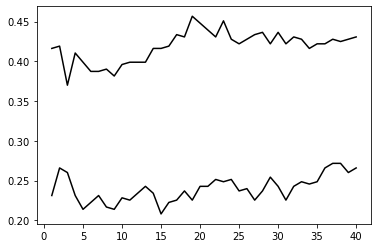

In [171]:
#Plotting and to see what is the conclusion in data
#As I see k=15 is my optimal k value.
plt.plot(range(1,41), ManhattanErrorList, color ="black")
plt.plot(range(1,41), EuclideanErrorList, color ="black")


In [172]:
#These are I import for accuracy score for knn model 
#Also seeing the confusion matrix in the next steps
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracyKNN = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.9971264367816092


In [173]:
# This is the comparing accuracy scores of regression-knn in dataframe
# As I see the Knn model is better from regression. Knn accuracy is closer to 1
# Also they are so close to 1 their accuracy is very high and efficient.
accuracyData = {'Model':["Accuracy of Logistic Regression","Accuracy of KNN"],'Accuracy':[accuracyLogReg, accuracyKNN]}
accuracyDF = pd.DataFrame(accuracyData)
accuracyDF

,Model,Accuracy
0,Accuracy of Logistic Regression,0.980206
1,Accuracy of KNN,0.997126


In [174]:
# First step for confusion matrix
pred_array = y_pred[:,1]
(unique, counts) = np.unique(pred_array, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [175]:
#This is how many 0-1 in data, I see the confusion matrix info as array
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test['satisfaction_satisfied'], pred_array)
cm

array([[169,   0],
       [  1, 178]], dtype=int64)

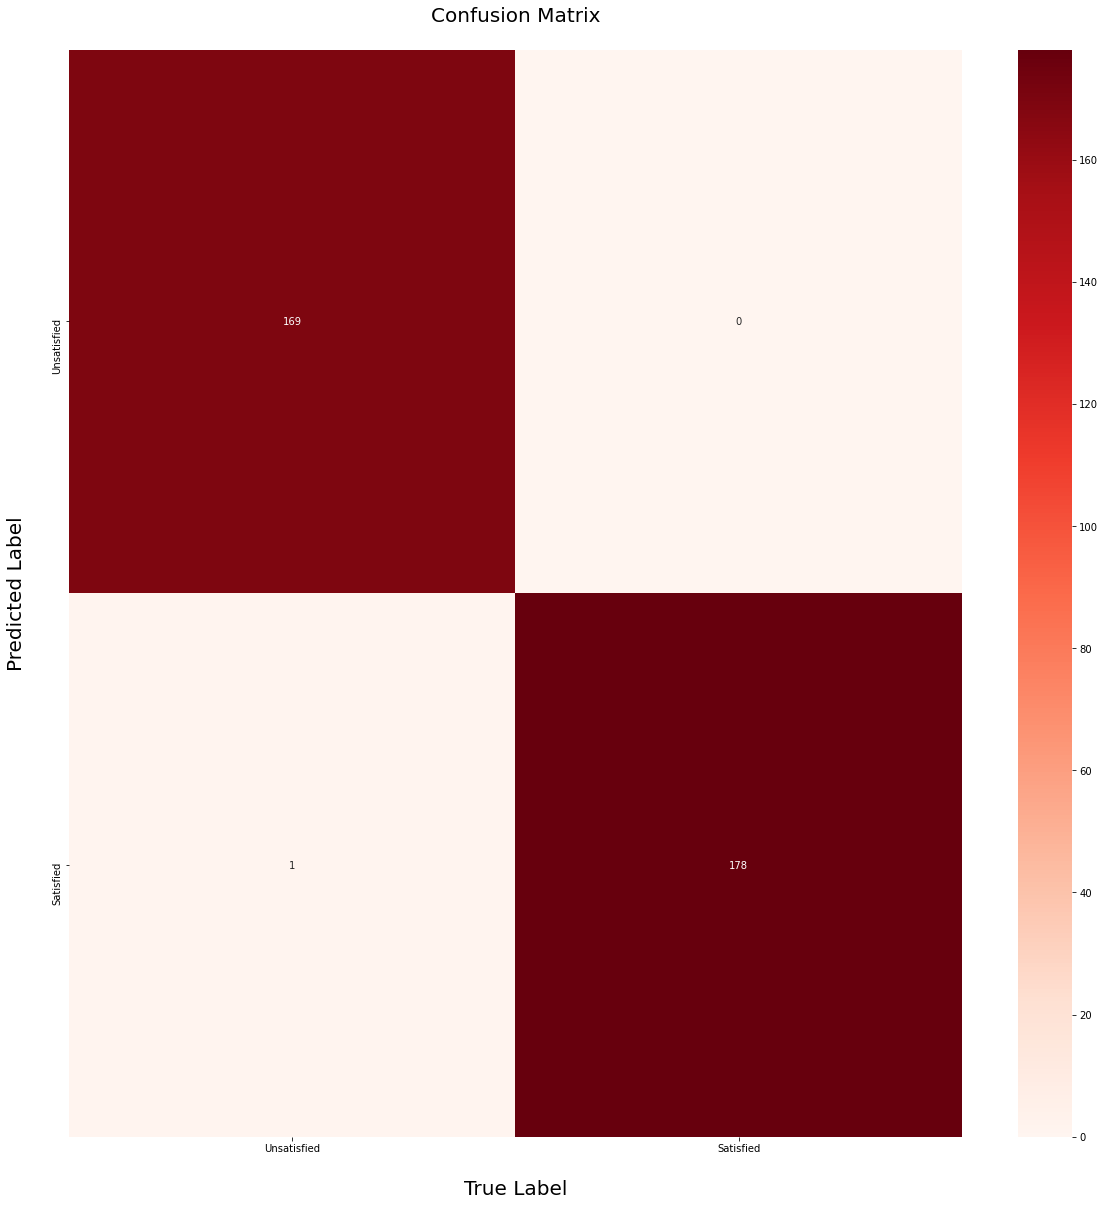

In [176]:
# This is my plot to show as visual
# Satisfied person is more then dissatisfied person. I can see the difference
# I see true and predicted label 
import seaborn as sns
plt.figure(figsize=(20,20))
sentiment_classes = ['Unsatisfied','Satisfied' ]
ax = sns.heatmap(cm, cmap = plt.cm.Reds, annot = True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix\n', fontsize=20)
plt.xlabel('\nTrue Label', fontsize=20)
plt.ylabel('Predicted Label\n', fontsize=20)
plt.show()

In [177]:
#Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate the prediction performance of each classifier

In [178]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

y_test_satisfied =  y_test["satisfaction_satisfied"]
y_test_dissatisfied =  y_test["satisfaction_dissatisfied"]
classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=1))
classifier.fit(X_test, y_test_dissatisfied)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=1))])

In [179]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _  = precision_recall_curve(y_test_satisfied, pred_array)

In [180]:
disp = PrecisionRecallDisplay(precision=precision, recall=recall)

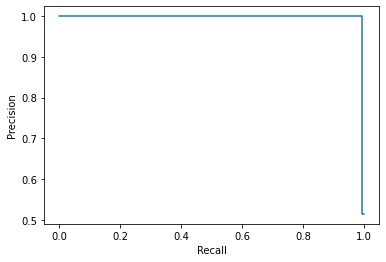

In [181]:
#That's my graphs to show satisfied graph - which gives maybe true cause in the samples on the internet is like that
disp.plot()
plt.show()

In [184]:
precision2, recall2, _  = precision_recall_curve(y_test_dissatisfied, pred_array)
disp = PrecisionRecallDisplay(precision=precision2, recall=recall2)

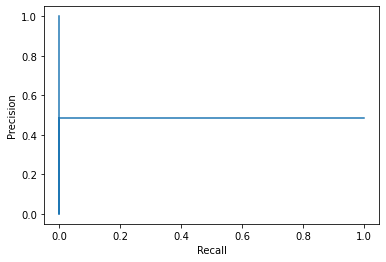

In [185]:
# There is the dissatisfied graph - the symmetric of satisfied graph
disp.plot()
plt.show()